In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [5]:
### Setting up the data_path
data_path = 'YOUR FILE PATH'

In [14]:
world  = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
capitals = gpd.read_file(data_path + 'ne_110m_populated_places\\ne_110m_populated_places.shp')
capitals = capitals[capitals["FEATURECLA"]=="Admin-0 capital"]
grat = gpd.read_file(data_path+ 'Graticule\\ne_110m_graticules_10.shp')

In [8]:
africa = world[world['continent'].isin(['Africa', 'Asia'])]

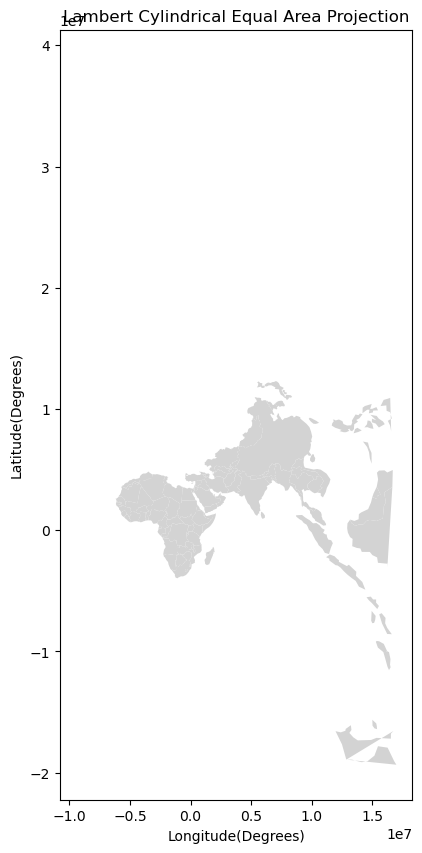

In [9]:
africa_9834 = africa.to_crs('EPSG:9834')
fig, ax = plt.subplots(figsize=(12,10))
africa_9834.plot(ax=ax, color="lightgray")

ax.set(xlabel="Longitude(Degrees)",
 ylabel="Latitude(Degrees)",
 title="Lambert Cylindrical Equal Area Projection")
plt.show()

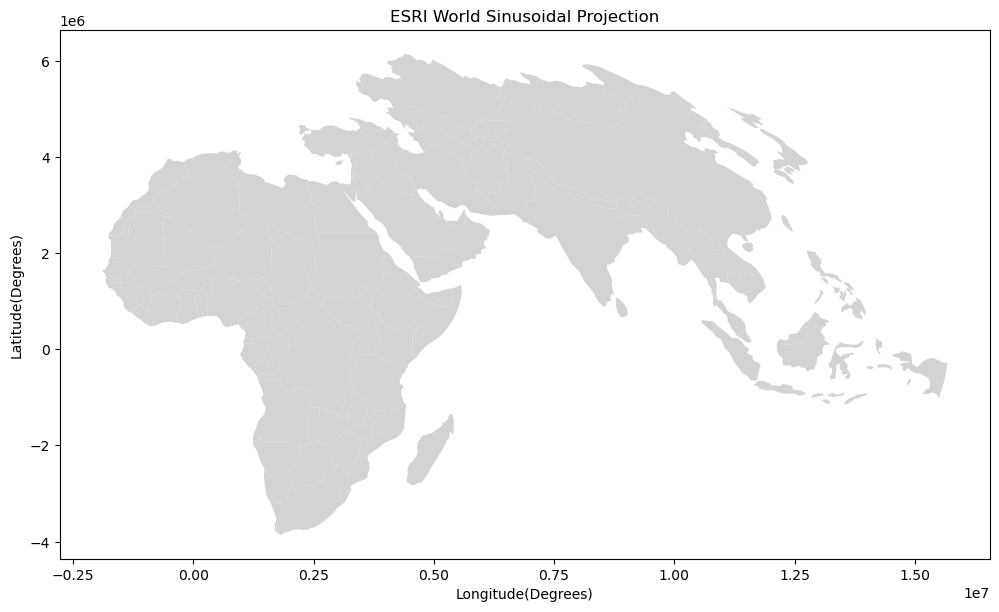

In [10]:
africa_3857 = africa.to_crs('ESRI: 54008')
fig, ax = plt.subplots(figsize=(12,10))
africa_3857.plot(ax=ax, color="lightgray")

ax.set(xlabel="Longitude(Degrees)",
 ylabel="Latitude(Degrees)",
 title="ESRI World Sinusoidal Projection")
plt.show()

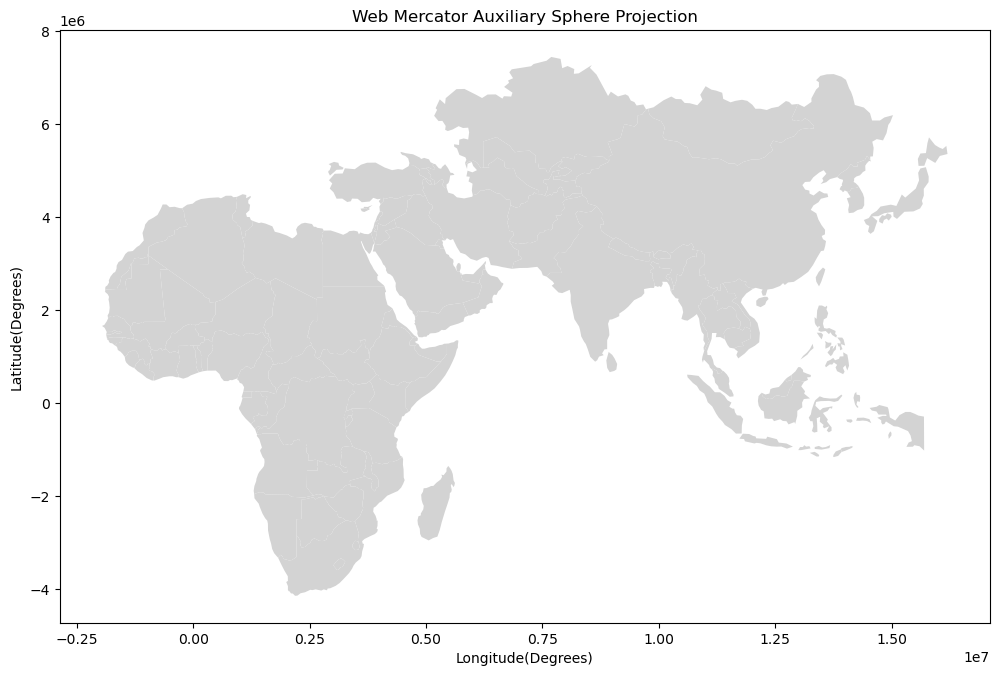

In [11]:
africa_3857 = africa.to_crs('EPSG:3857')
fig, ax = plt.subplots(figsize=(12,10))
africa_3857.plot(ax=ax, color="lightgray")

ax.set(xlabel="Longitude(Degrees)",
 ylabel="Latitude(Degrees)",
 title="Web Mercator Auxiliary Sphere Projection")
plt.show()

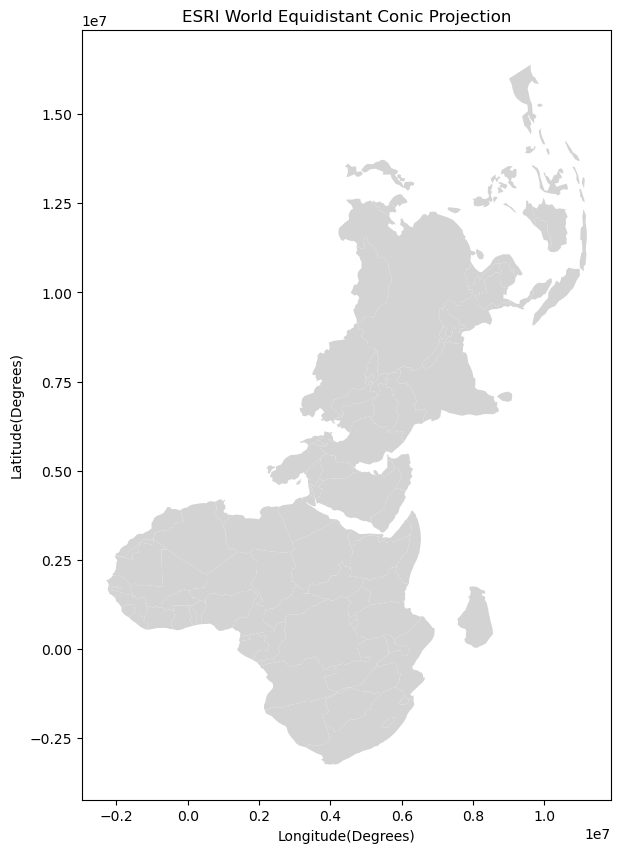

In [12]:
africa_54027 = africa.to_crs('ESRI:54027')
fig, ax = plt.subplots(figsize=(12,10))
africa_54027.plot(ax=ax, color="lightgray")

ax.set(xlabel="Longitude(Degrees)",
 ylabel="Latitude(Degrees)",
 title="ESRI World Equidistant Conic Projection")
plt.show()

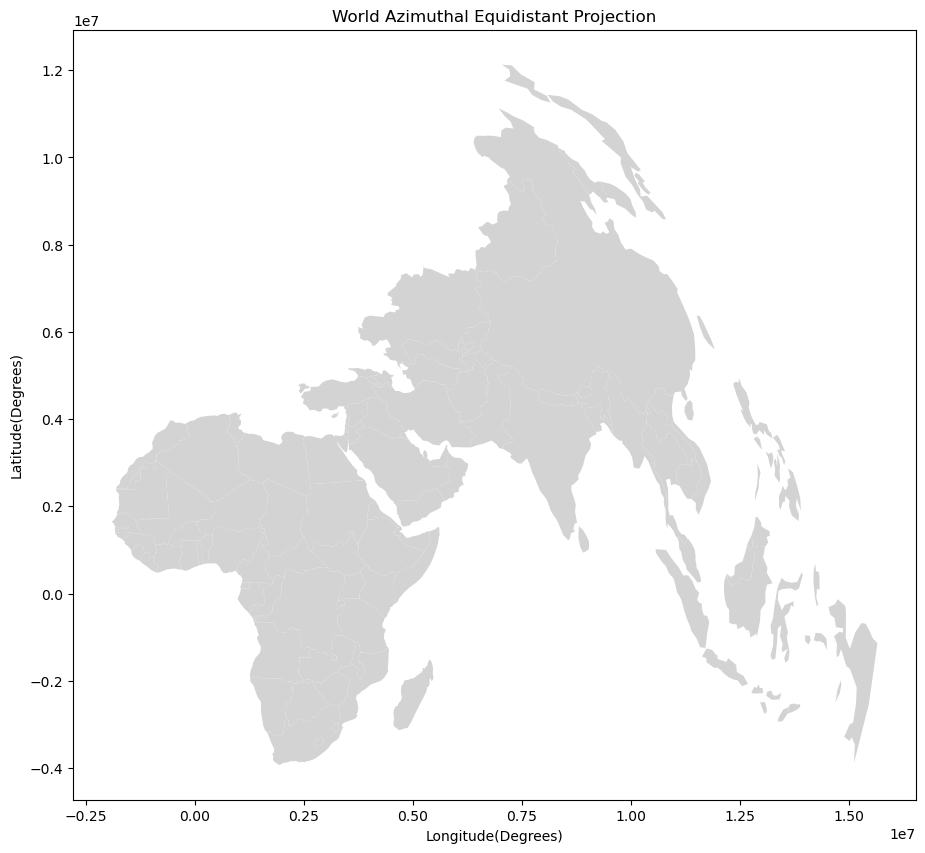

In [13]:
africa_54032 = africa.to_crs('ESRI:54032')
fig, ax = plt.subplots(figsize=(12,10))
africa_54032.plot(ax=ax, color="lightgray")

ax.set(xlabel="Longitude(Degrees)",
 ylabel="Latitude(Degrees)",
 title="World Azimuthal Equidistant Projection")
plt.show()

## Hands on with Geopandas

In [15]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [16]:
capitals.crs == world.crs == grat.crs

True

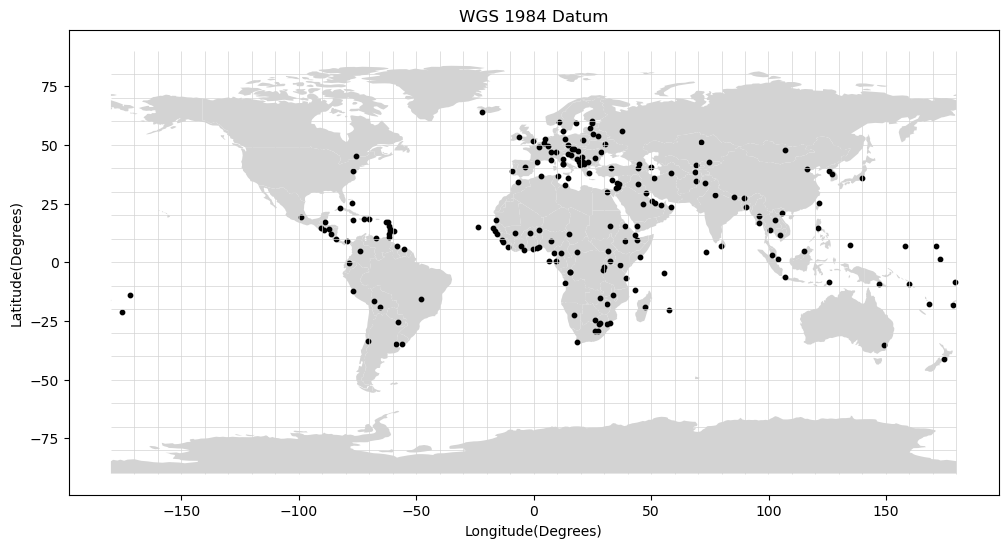

In [17]:
fig, ax = plt.subplots(figsize=(12,10))
world.plot(ax=ax, color="lightgray")
capitals.plot(ax=ax, color="black", markersize=10, marker ="o")
grat.plot(ax=ax, color="lightgray", linewidth=0.5)
ax.set(xlabel="Longitude(Degrees)",
 ylabel="Latitude(Degrees)",
 title="WGS 1984 Datum")
plt.show()

In [18]:
world_ae = world.to_crs("ESRI:54032")
graticules_ae = grat.to_crs("ESRI:54032")

In [19]:
world_ae.crs

<Derived Projected CRS: ESRI:54032>
Name: World_Azimuthal_Equidistant
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World_Azimuthal_Equidistant
- method: Modified Azimuthal Equidistant
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

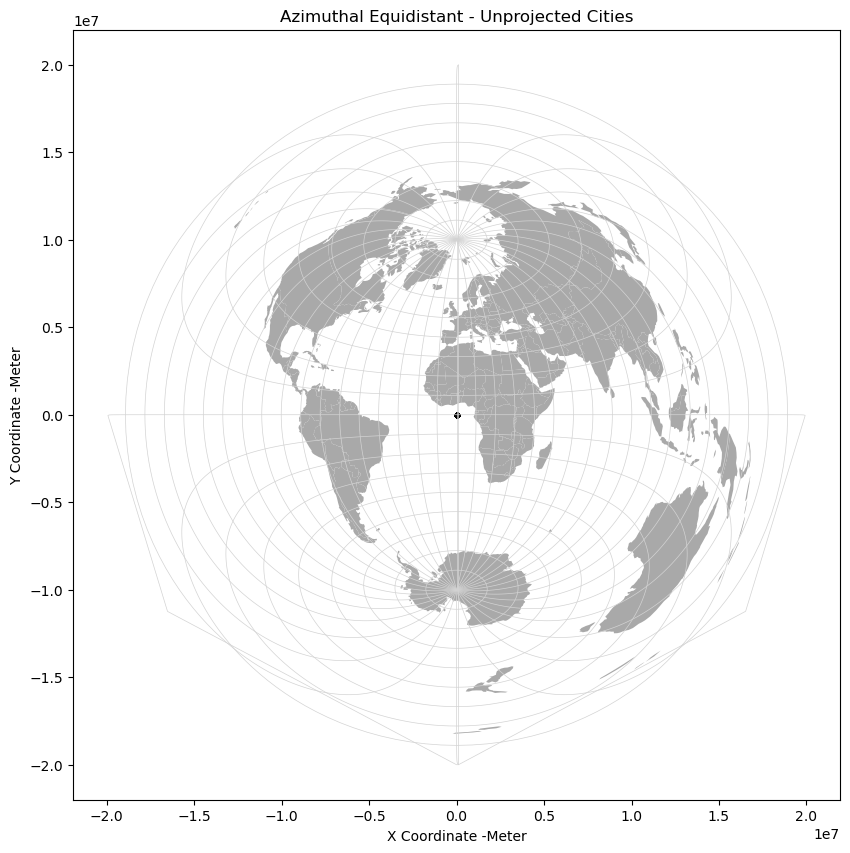

In [20]:
def plot_map_layers(gdf_1, gdf_2, gdf_3, name,unit):
     fig, ax = plt.subplots(figsize=(12,10))
     gdf_1.plot(ax=ax, color="darkgray")
     gdf_2.plot(ax=ax, color="black", markersize=10, marker ="o")
     gdf_3.plot(ax=ax, color="lightgray", linewidth=0.5)
     ax.set(xlabel="X Coordinate -"+ unit,
            ylabel="Y Coordinate -" + unit,
            title=name
            )
plt.show()
plot_map_layers(world_ae, capitals, graticules_ae, "Azimuthal Equidistant - Unprojected Cities", "Meter")

In [22]:
capitals.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

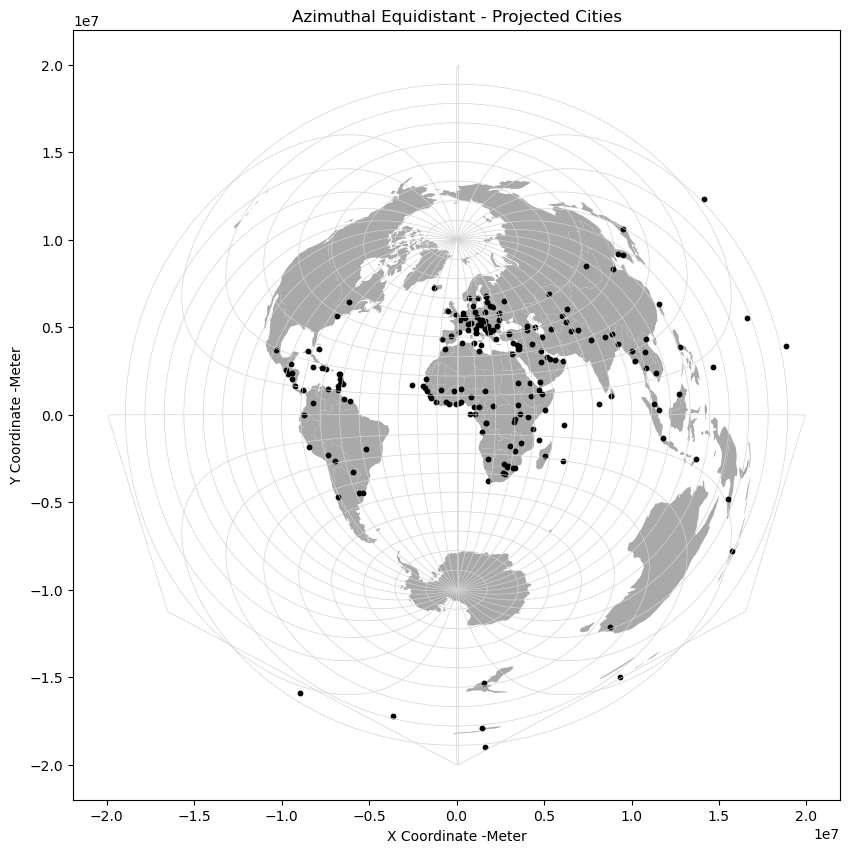

In [25]:
capitals_ae = capitals.to_crs("ESRI:54032")
plot_map_layers(world_ae, capitals_ae, graticules_ae, "Azimuthal Equidistant - Projected Cities", "Meter")